In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

%matplotlib inline

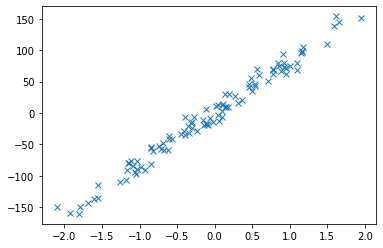

In [2]:
features = 1
samples = 100
x, y = datasets.make_regression(n_features=features, n_samples=samples, noise=10)
plt.plot(x, y, 'x')

In [3]:
θ = (np.random.rand(features + 1) - 0.5) * 100
θ = θ.reshape(1, -1)
θ

array([[-27.00787517, -35.5010311 ]])

error: 5834.765133678405


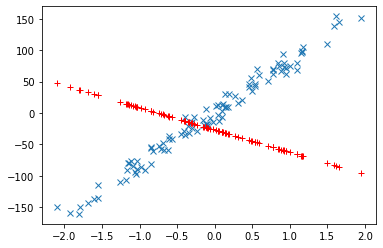

In [4]:
prerdictions = θ[:, 0] + θ[:,1:] @ x.T
prerdictions = prerdictions.reshape(-1)

error = 1/(2 * samples) * np.sum((prerdictions - y) ** 2)

plt.plot(x, y, 'x')
plt.plot(x, prerdictions, '+r')
print(f'error: {error}')

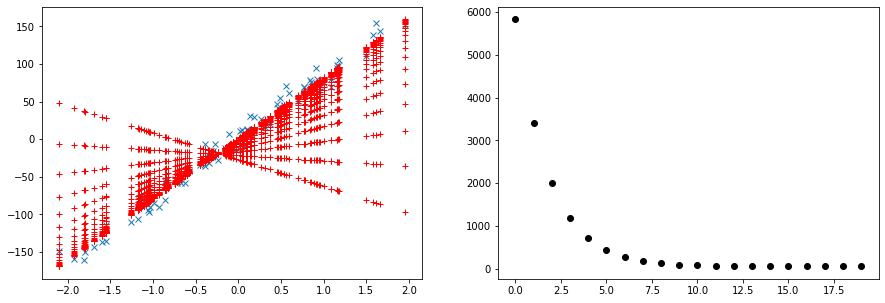

In [5]:
def gradient_decent(repeat, lr = 0.3):

    plt.figure(1, figsize=(15, 5))
    plt.subplot(121)
    plt.plot(x, y, 'x')
    for i in range(repeat):

        prerdictions = θ[:, 0] + θ[:,1:] @ x.T
        prerdictions = prerdictions.reshape(-1)

        error = 1/(2 * samples) * np.sum((prerdictions - y) ** 2)
        θ[:,0] -= lr/samples * np.sum(prerdictions - y)
        θ[:,1:] -= lr/samples * np.sum((prerdictions - y) @ x)

        plt.subplot(121)
        plt.plot(x, prerdictions, '+r')
        plt.subplot(122)
        plt.plot(i, error, 'ok')

    plt.show()

gradient_decent(20)